### Numerical integration
+ #### "Home grown"
+ #### Using `quad` and `dblquad` from the `integrate` submodule of `scipy`

In [1]:
import numpy as np
import scipy as sp
from scipy import integrate

import matplotlib as mpl  
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [3]:
def f(x):
    return x**4

In [4]:
def g(x):
    return x**2*np.sin(100*x**2)**2

### Simple (and non-pythonic) method for a simple function

Let's integrate the function

$$
f(x) = x^4
$$ 
from $x_1=0$ to $x_2 = 3$.  We know that the answer is

$$
\int_0^3 x^4\, dx = \left. \frac{1}{5}x^5\, \right| = \frac{3^5}{5} = 48.6
$$

Use simple Riemann sum:

Choose a set of $x_i$ that are equally spaced by $\Delta x$ throughout the interval of interest.
The integral is then approximated by 

$$
\int f(x)\, dx \simeq \sum_i f(x_i)\, \Delta x
$$

For this example I evaluate the function at the midpoint of each interval.

#### Information about endpoints and number of intervals

In [5]:
x1 = 0    # left endpoint
x2 = 3    # right endpoint
n = 10000   # number of intervals
dx = (x2-x1)/n  # Delta x

#### Simple integrator stepping through intervals using a loop

In [6]:
rsum = 0
for i in range(n):
    x = x1 + dx/2 + i*dx
    y = f(x)
    rsum = rsum + y
    
rsum*dx

48.59999959499994

Using 100 intervals gets us pretty close to the answer we know is correct.  (Using 10 intervals returns 48.2.)

#### Same integration algorithm but without explicit looping.

In [7]:
x = np.linspace(x1+dx/2,x2-dx/2,n)
y = f(x)

np.sum(y)*dx

48.599999594999986

### Example 2

Now integrate the function from 

$$ 
g(x) = x^2 \sin(100x^2) 
$$

$x_1=0$ to $x_2 = 2$.

In [8]:
x1 = 0    # left endpoint
x2 = 2    # right endpoint
n = 200   # number of intervals
dx = (x2-x1)/n  # Delta x

In [9]:
x = np.linspace(x1+dx/2,x2-dx/2,n)
y = g(x)

np.sum(y)*dx

1.2123190486562152

#### Try changing the number of interval in cells above.  The results change!
#### Look at the function to see why.

<IPython.core.display.Javascript object>


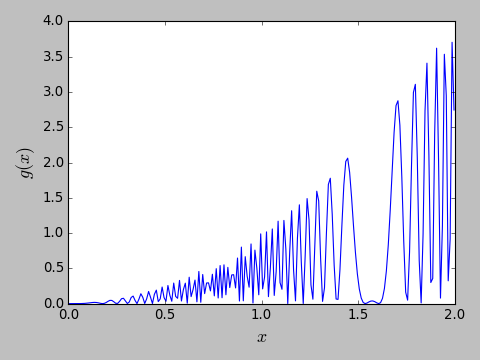

In [10]:
plt.figure()
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$g(x)$');


### Examples using <code>quad</code> method from the <code>integrate</code> submodule of <code>scipy</code>
Sophisticated numerical integration routines do much of the "dirty work" for you.  For example, you don't have 
to specify the number of intervals (for simple integrations); and the routines will return an estimate of the error (but you do retain some controls).

Here's how to integrate the function <code>f</code> from above from 0 to 3:


In [11]:
integrate.quad(f,0,3)

(48.599999999999994, 5.39568389967826e-13)

The first element of the tuple returned by the function is the approximate value, and the second is 
the estimated error.  These are consistent with the exact answer.

If you just want the value of the intergral, just pick of the first value returned by <code>quad</code>:

In [12]:
integrate.quad(f,0,3)[0]

48.599999999999994

Here's what happens when <code>quad</code> is used on the more problematic function $g(x)$:

In [13]:
integrate.quad(g,0,2)

/home/mligare/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(1.3311544977190692, 0.0006258410606639012)

The value that is returned is accompanied by a warning: there's something fishy with this function on this 
interval, and <code>quad</code> won't return a value without a warning that the default maximum of the number 
of intervals isn't "good enough" to reach the default precision.  Therefore, the user must either
change the default on the number of intervals, or else change the default precision.

After looking at the graph of the function $g(x)$, I choose to increase the allowed number of intervals:

In [14]:
integrate.quad(g,0,2,limit=80)

(1.3311544977210887, 1.870593173189536e-08)

I get an output without a pink warning!  But note that the number of intervals needed by <code>quad</code> 
is very much smaller than the number needed to achieve a precision <code>1.9e-08</code> when I use the simple numerical 
integration I introduced above. What's going on?

Well, <code>quad</code> is more sophisticated than I am.  It uses <i>adaptive step sizes</i>, meaning 
that it uses small intervals $\Delta x$ when necessary, i.e., when the the period of the <code>sin</code>
function is small, and larger intervals where the period is larger.

How adaptive steps sizes work is not a topic for this course. 

## Two-dimensional Integration

In [15]:
def f2(y,x):
    return 1

def f3(y,x):
    return x

def ramp(x):
    return 0.5*x

def circle(x):
    return np.sqrt(1 - x**2)

def ncircle(x):
    return -np.sqrt(1 - x**2)

#### Area of a rectangle

In [16]:
x1 = 0
x2 = 4
y1 = 0
y2 = 0.5

integrate.dblquad(f2, x1, x2, y1, y2)

(2.0, 2.220446049250313e-14)

#### Area of a triangle

In [17]:
x1 = 0
x2 = 4
y1 = 0
y2 = ramp

integrate.dblquad(f2, x1, x2, y1, y2)

(4.0, 4.440892098500626e-14)

$$
\int_{\rm y=10}^{15}\int_{\rm x = 0}^4 x\, dx\, dy = 40
$$

In [18]:
x1 = 0
x2 = 4
y1 = 10
y2 = 15
integrate.dblquad(f3, x1, x2, y1, y2)

(40.0, 4.440892098500626e-13)

#### Area of a quadrant of a unit circle
Answer should be $\pi/4 = 0.7854$ 

In [19]:
x1 = 0
x2 = 1
y1 = 0
y2 = circle

integrate.dblquad(f2, x1, x2, y1, y2)

(0.7853981633974481, 8.833911380179416e-11)

#### Area of a complete unit circle¶
Answer should be $\pi$

In [20]:
x1 = -1
x2 = 1
y1 = ncircle
y2 = circle

integrate.dblquad(f2, x1, x2, y1, y2)

(3.1415926535897967, 2.000470900043183e-09)

#### Order of limits clarification -- Be careful!

$$
\iint_{x=0, y=0}^{x=1, y=2} x y^2 dx\, dy = \frac{4}{3}
$$

In [21]:
def f4(y,x):
    return x*y**2

In [22]:
integrate.dblquad(f4, 0, 1, 0, 2), integrate.dblquad(f3, 0, 2, 0, 1)

((1.3333333333333335, 2.954166042199163e-14),
 (1.9999999999999998, 2.2204460492503128e-14))

## Three-dimensional integration

#### Volume of octant of unit sphere.  Resulty should be $\pi/6 = 0.5236$

In [23]:
def f4(x,y,z):
    return 1

def sphere(x,y):
    return np.sqrt(1- x**2 - y**2)

In [24]:
x1 = 0
x2 = 1
y1 = 0
y2 = circle
z1 = 0
z2 = sphere

integrate.tplquad(f4, x1, x2, y1, y2, z1, z2)

(0.5235987755982989, 8.83377815341646e-11)

# Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [25]:
load_ext version_information

In [26]:
%version_information numpy,scipy, matplotlib

Software versions
Python 3.7.13 64bit [GCC 7.5.0]
IPython 7.31.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.21.5
scipy 1.7.3
matplotlib 3.5.2
Mon Nov 14 14:13:59 2022 EST